## Assignment 7 Group 12

### Shashank Siripragada & Sneha Swaroop

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from scipy.stats.distributions import norm, gamma

#### Let's consider a simple data set of Nutrition data on 80 Cereal products containing 4 columns. (Protien, fat, fiber, carbo)

In [51]:
df= pd.read_csv('cereal.csv')
df.set_index('name', inplace=True)
df.head()


,protein,fat,fiber,carbo
name,,,,
100% Bran,4,1,10.0,5.0
100% Natural Bran,3,5,2.0,8.0
All-Bran,4,1,9.0,7.0
All-Bran with Extra Fiber,4,0,14.0,8.0
Almond Delight,2,2,1.0,14.0


In [52]:
df.describe()

,protein,fat,fiber,carbo
count,77.000000,77.000000,77.000000,77.000000
mean,2.545455,1.012987,2.151948,14.597403
std,1.094790,1.006473,2.383364,4.278956
min,1.000000,0.000000,0.000000,-1.000000
25%,2.000000,0.000000,1.000000,12.000000
50%,3.000000,1.000000,2.000000,14.000000
75%,3.000000,2.000000,3.000000,17.000000
max,6.000000,5.000000,14.000000,23.000000


In [53]:
df.isna().any()

protein    False
fat        False
fiber      False
carbo      False
dtype: bool

#### We don't have any missing values in the columns.

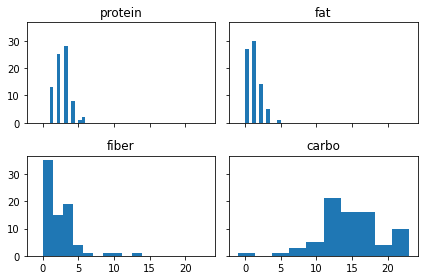

In [54]:
_= df.hist(sharex=True, sharey=True, grid=False)
plt.tight_layout()

In [55]:
df_mean = df.mean()
df_mean

protein     2.545455
fat         1.012987
fiber       2.151948
carbo      14.597403
dtype: float64

In [56]:
df_var = df.var()
df_var

protein     1.198565
fat         1.012987
fiber       5.680424
carbo      18.309467
dtype: float64

In [57]:
alpha_mom = df_mean ** 2 / df_var
beta_mom = df_var / df_mean
alpha_mom, beta_mom

(protein     5.405915
 fat         1.012987
 fiber       0.815235
 carbo      11.637923
 dtype: float64,
 protein    0.470865
 fat        1.000000
 fiber      2.639666
 carbo      1.254296
 dtype: float64)

#### Then, use the gamma pdf function to plot the distributions implied by the calculated alphas and betas.

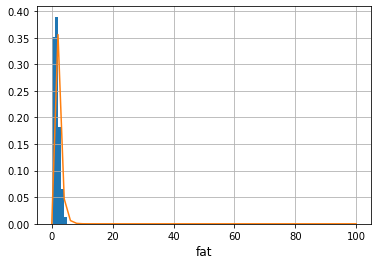

In [59]:
df.fat.hist(density=True, bins=5)
plt.plot(np.linspace(0, 100), gamma.pdf(np.linspace(0,100), alpha_mom[1], beta_mom[1]))

plt.xlabel('fat',  fontsize = 12)

plt.show()

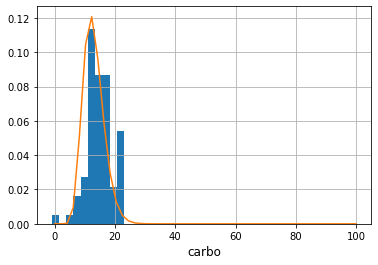

In [60]:
df.carbo.hist(density=True, bins=10)
plt.plot(np.linspace(0, 100), gamma.pdf(np.linspace(0,100), alpha_mom[3], beta_mom[3]))


plt.xlabel('carbo',  fontsize = 12)
plt.show()

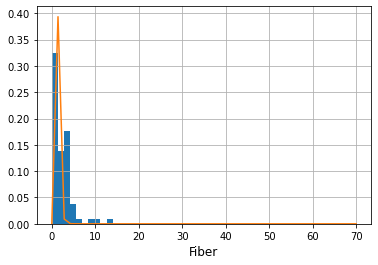

In [61]:
df.fiber.hist(density=True, bins=10)
plt.plot(np.linspace(0, 70), gamma.pdf(np.linspace(0,170), alpha_mom[2], beta_mom[2]))

plt.xlabel('Fiber',  fontsize = 12)
plt.show()

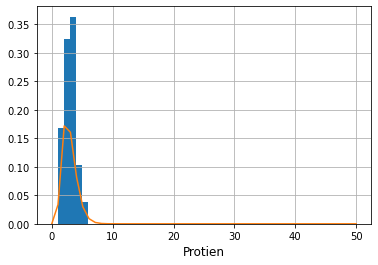

In [62]:
df.protein.hist(density=True, bins=5)
plt.plot(np.linspace(0, 50), gamma.pdf(np.linspace(0,100), alpha_mom[0], beta_mom[0]))

plt.xlabel('Protien',  fontsize = 12)
plt.show()

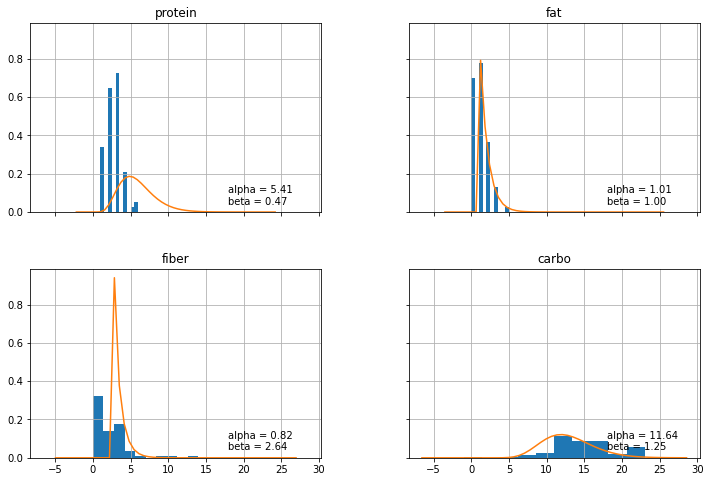

In [69]:
axs = df.hist(density=True, figsize=(12, 8), sharex=True, sharey=True, bins=10, grid=True)

for ax in axs.ravel():
    m = ax.get_title()
    # Plot fitted distribution
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, gamma.pdf(x, alpha_mom[m], beta_mom[m]))
    
    # Annotate with parameter estimates
    label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom[m], beta_mom[m])
    ax.annotate(label, xy=(18, 0.04))
    
#plt.tight_layout()
